## Visión por Computadora 1 - Cohorte 17
## Trabajo Práctico 3
## Paola Cartala - Florentino Arias

## Parte 1: Detección del logo en cada imagen sin falsos positivos.
Vamos a utilizar matchTemplate() de OpenCV para implementar el método de template matching.

Para solucionar el problema de las escalas al comparar, implementamos una función que devuelve una lista de imágenes en distintas escalas y proporciones. Vamos comparando cada imagen en distintas escalas con el template también en sus distintas escalas y nos quedamos con el que arroje la mejor métrica en el matching.

La similitud máxima fue de 0.24
Tamaño del template original: (175, 400)
El mejor tamaño del template fue de (88, 200)
Tamaño de la imagen original: (1389, 1389, 3)
El mejor tamaño de la imagen fue de (556, 1806)


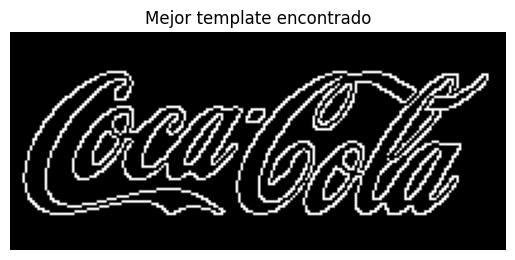

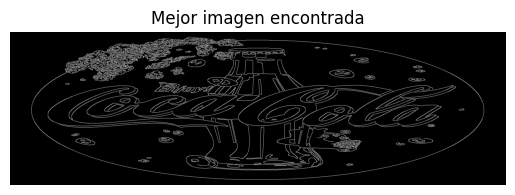

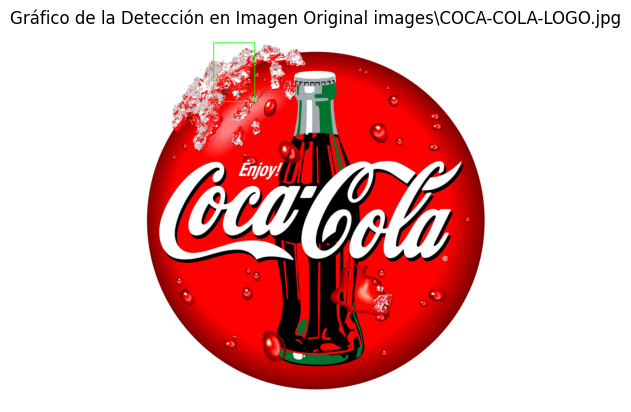

La similitud máxima fue de 0.27
Tamaño del template original: (175, 400)
El mejor tamaño del template fue de (88, 200)
Tamaño de la imagen original: (500, 207, 3)
El mejor tamaño de la imagen fue de (650, 269)


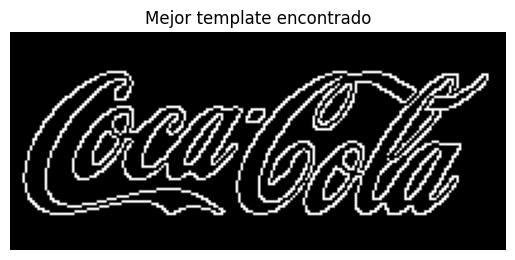

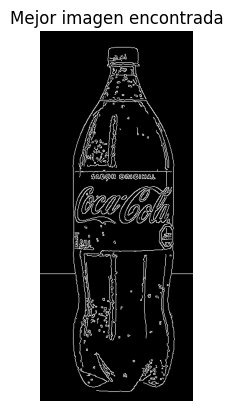

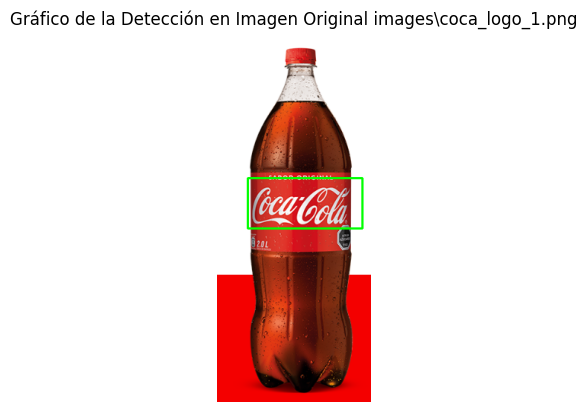

La similitud máxima fue de 0.24
Tamaño del template original: (175, 400)
El mejor tamaño del template fue de (88, 200)
Tamaño de la imagen original: (363, 233, 3)
El mejor tamaño de la imagen fue de (254, 303)


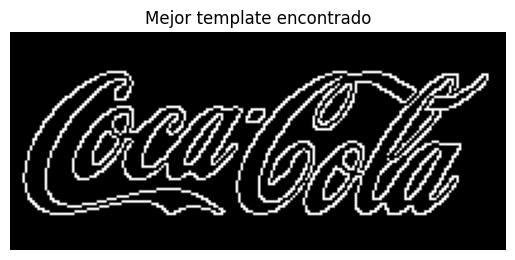

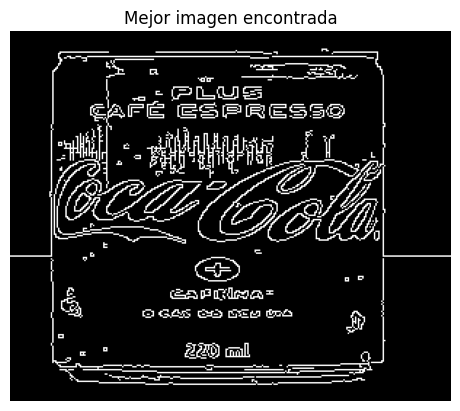

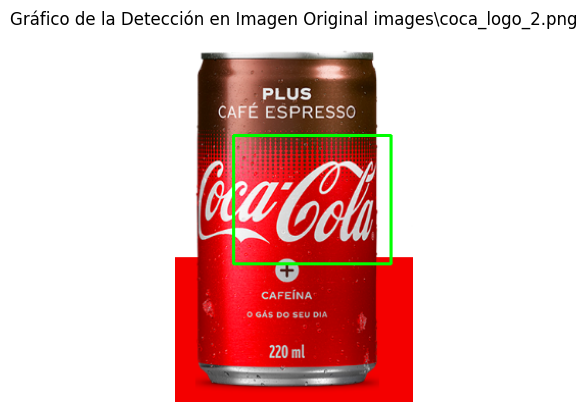

La similitud máxima fue de 0.24
Tamaño del template original: (175, 400)
El mejor tamaño del template fue de (88, 200)
Tamaño de la imagen original: (598, 799, 3)
El mejor tamaño de la imagen fue de (777, 1039)


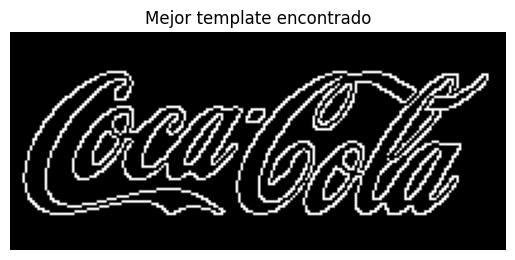

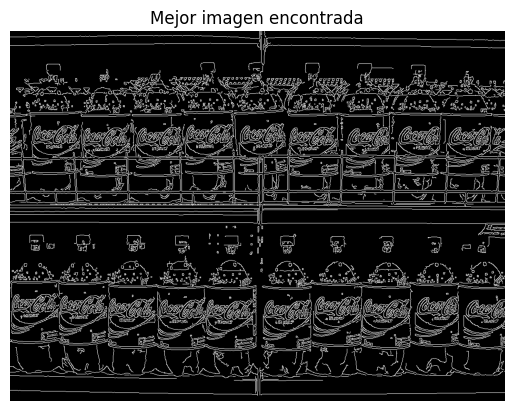

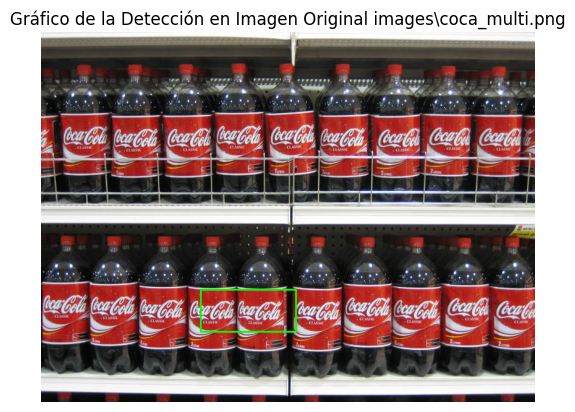

La similitud máxima fue de 0.24
Tamaño del template original: (175, 400)
El mejor tamaño del template fue de (88, 200)
Tamaño de la imagen original: (493, 715, 3)
El mejor tamaño de la imagen fue de (345, 715)


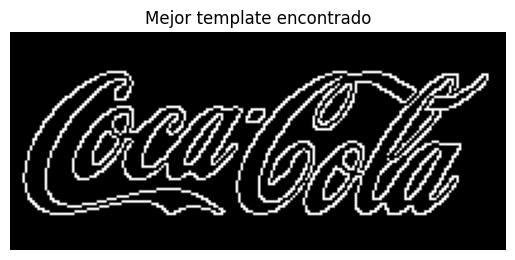

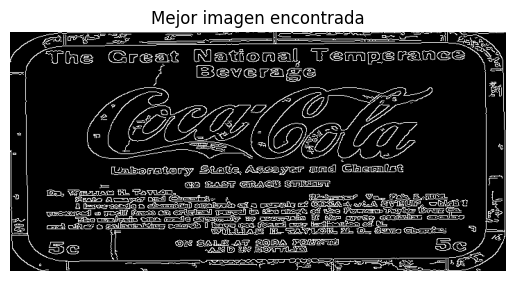

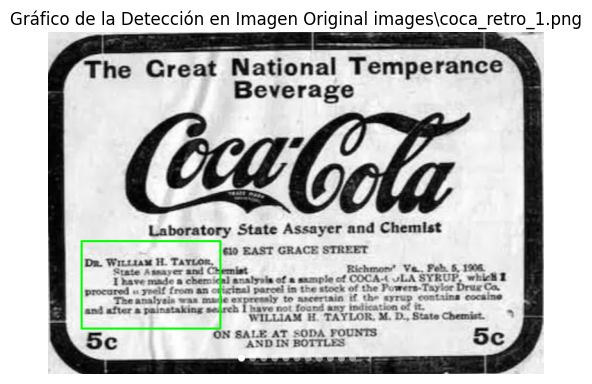

La similitud máxima fue de 0.32
Tamaño del template original: (175, 400)
El mejor tamaño del template fue de (88, 200)
Tamaño de la imagen original: (429, 715, 3)
El mejor tamaño de la imagen fue de (558, 930)


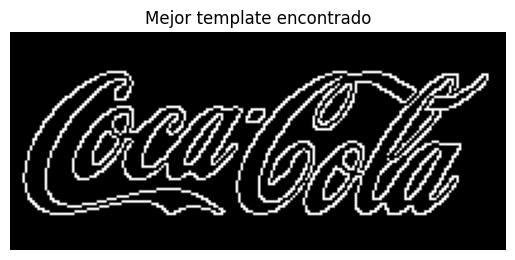

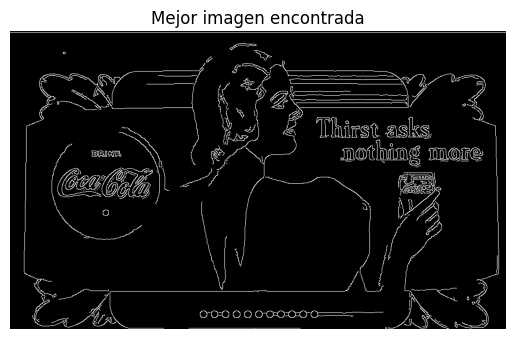

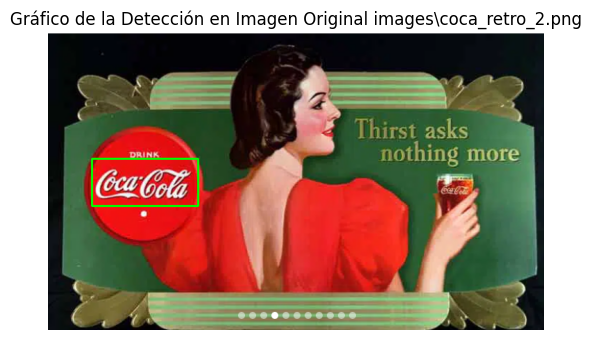

La similitud máxima fue de 0.26
Tamaño del template original: (175, 400)
El mejor tamaño del template fue de (88, 200)
Tamaño de la imagen original: (450, 687, 3)
El mejor tamaño de la imagen fue de (315, 481)


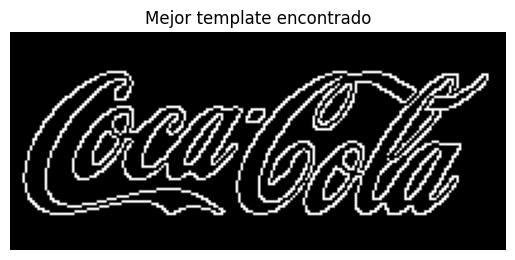

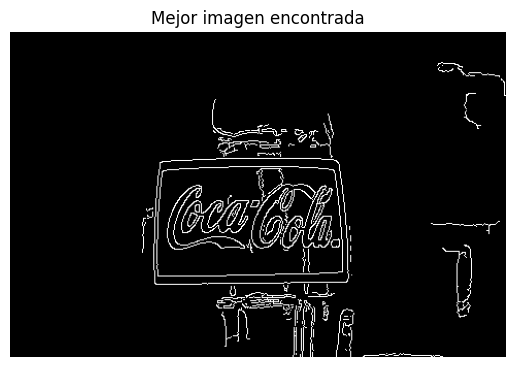

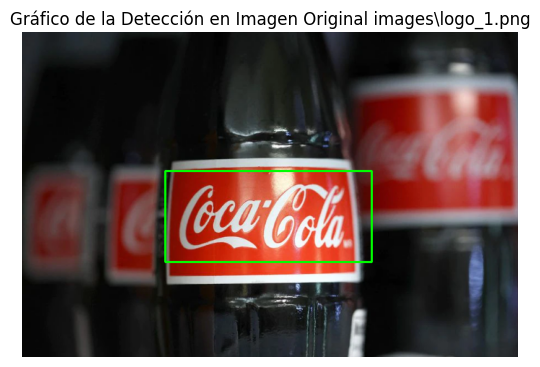

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import glob

# Los 6 métodos posibles para comparación, a modo de ayudamemoria
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

# Cargamos el template en escala de grises
template = cv.imread('template/pattern.png', cv.IMREAD_GRAYSCALE)
template_h, template_w = template.shape  # Tomar las dimensiones del template

# Lista de todas las imágenes en la carpeta 'images'
all_images_paths = glob.glob('images/*.*')

# Devolver una lista de copias escaladas del template sin respetar necesariamente la proporción de aspecto
# NOTA 1: PREVIO A ESTO SE PROBÓ CON PIRÁMIDES GAUSSIANAS UP Y DOWN, PERO NO SE OBTUVIERON BUENOS RESULTADOS.
# NOTA 2: TAMBIÉN SE PROBÓ CON PIRÁMIDES DE ESCALAS CON PROPORCIÓN, OBTENIENDO NUEVAMENTE RESULTADOS NO SATISFACTORIOS.
def piramide_escalas_no_proporcion(img): # Función que genera una pirámide de escalas de una imagen
    piramide = []
    
    # Listas de escalas para ancho y alto
    scales_x = np.linspace(0.1, 2.5, 15)  # Escalas para el ancho (fx)
    scales_y = np.linspace(0.1, 2.5, 15)  # Escalas para el alto (fy)

    # Iterar sobre las combinaciones de escalas de fx y fy
    for fx in scales_x:
        for fy in scales_y:
            # Redimensionar la imagen usando factores independientes para el ancho y alto
            escalada = cv.resize(img, None, fx=fx, fy=fy, interpolation=cv.INTER_LINEAR)
            piramide.append(escalada)

    return piramide

# Esta variante de la función anterior permite ingresar los valores de escalamiento y además devuelve una lista de tuplas con la imagen escalada y los factores de escala fx y fy
# Esto resulta útil para poder ubicar el rectángulo en la imagen original
def piramide_imagenes_y_escalas_no_proporcion(img, min, max, cant):
    piramide = []
    
    # Listas de escalas para ancho y alto
    scales_x = np.linspace(min, max, cant)  # Escalas para el ancho (fx)
    scales_y = np.linspace(min, max, cant)  # Escalas para el alto (fy)

    # Iterar sobre las combinaciones de escalas de fx y fy
    for fx in scales_x:
        for fy in scales_y:
            # Redimensionar la imagen usando factores independientes para el ancho y alto
            imagen_escalada = cv.resize(img, None, fx=fx, fy=fy, interpolation=cv.INTER_LINEAR)
            elemento_piramide = [imagen_escalada, fx, fy]
            piramide.append(elemento_piramide)

    return piramide

# Función para aplicar Canny a cada template escalado, teniendo en cuenta que la la pirámide de templates es una lista de tuplas con la imagen escalada y los factores de escala fx y fy
def aplicar_canny_a_piramide(piramide):
    piramide_canny = []
    for tpl in piramide:
        tpl_canny = cv.Canny(tpl[0], 50, 150)
        piramide_canny.append([tpl_canny, tpl[1], tpl[2]])
    return piramide_canny

# Generar la pirámide de imágenes escaladas del template con sus bordes
template_pyramid = piramide_imagenes_y_escalas_no_proporcion(template, 0.5, 1.5, 4)
# Aplicar Canny a cada template escalado, teniendo en cuenta que la la pirámide de templates es una lista de tuplas con la imagen escalada y los factores de escala fx y fy
template_pyramid_canny = aplicar_canny_a_piramide(template_pyramid)

for path in all_images_paths:  # Iterar sobre todas las imágenes
    image = cv.imread(path)  # Cargar la imagen
    gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)  # Convertir la imagen a escala de grises

    # Creo una pirámide de escalas de la imagen
    image_pyramid = piramide_imagenes_y_escalas_no_proporcion(gray_image, 0.4, 1.3, 4)
    image_pyramid_canny = aplicar_canny_a_piramide(image_pyramid)

    # Inicializar las variables para almacenar los mejores resultados
    best_match_val = -1  # Inicializar con un valor bajo
    best_match_location = None
    best_template = None
    best_image = None
    best_scale_factor_template = None
    best_scale_factor_image = None

    for resized_image in image_pyramid_canny:  # Iterar sobre cada nivel de la pirámide de la imagen
        
        # Iterar sobre cada nivel del template en la pirámide
        for resized_template in template_pyramid_canny:
            tpl_h, tpl_w = resized_template[0].shape
            img_h, img_w = resized_image[0].shape

            # Obtener el factor de escala correspondiente del template y de la imagen
            scale_factor_template = [resized_template[1], resized_template[2]]
            scale_factor_image = [resized_image[1], resized_image[2]]

            # Asegurarse de que el template no sea más grande que la imagen
            if tpl_h > img_h or tpl_w > img_w:
                continue # Saltearse este template

            # Aplicar template matching
            result = cv.matchTemplate(resized_image[0], resized_template[0], cv.TM_CCORR_NORMED)
            min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)

            # Actualizar la mejor coincidencia si es mejor que la actual
            if max_val > best_match_val:
                best_match_val = max_val
                best_match_location = max_loc
                best_template = resized_template[0]
                best_image = resized_image[0]
                best_scale_factor_template = scale_factor_template
                best_scale_factor_image = scale_factor_image

    if best_match_location is not None:
        # Ajustar las coordenadas para la imagen original usando el factor de escala
        top_left = (
            int(best_match_location[0] / best_scale_factor_image[0]),
            int(best_match_location[1] / best_scale_factor_image[1])
        )
        template_h, template_w = best_template.shape
        bottom_right = (
            int((best_match_location[0] + template_w) / best_scale_factor_image[0]),
            int((best_match_location[1] + template_h) / best_scale_factor_image[1])
        )

        # Dibujar el rectángulo en la imagen original
        cv.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)

        print(f"La similitud máxima fue de {best_match_val:.2f}")
        print("Tamaño del template original:", template.shape)
        print(f"El mejor tamaño del template fue de {best_template.shape}")
        print(f"Tamaño de la imagen original: {image.shape}")
        print(f"El mejor tamaño de la imagen fue de {best_image.shape}")

        # Mostrar el template que mejor coincidió
        plt.imshow(best_template, cmap='gray')
        plt.title('Mejor template encontrado')
        plt.axis('off')
        plt.show()

        # Mostrar el template que mejor coincidió
        plt.imshow(best_image, cmap='gray')
        plt.title('Mejor imagen encontrada')
        plt.axis('off')
        plt.show()

        # Mostrar el resultado (imagen original con el bounding box dibujado)
        plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
        plt.title(f'Gráfico de la Detección en Imagen Original {path}')
        plt.axis('off')
        plt.show()

        # Mostrar el resultado (imagen con el rectángulo dibujado)
        #plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
        #plt.title(f'Detección en {path}')
        #plt.axis('off')
        #plt.show()
    else:
        print(f"No se encontró ninguna coincidencia en {path}")


### MEJORA USANDO UNSHARP MASKING

La similitud máxima fue de 0.24
Tamaño del template original: (175, 400)
El mejor tamaño del template fue de (88, 200)
Tamaño de la imagen original: (1389, 1389, 3)
El mejor tamaño de la imagen fue de (694, 1806)


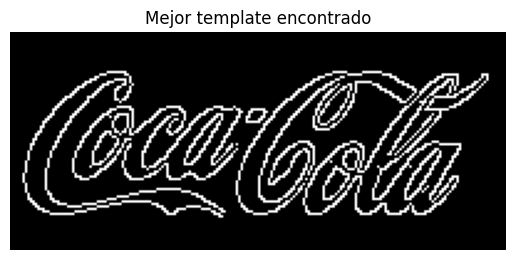

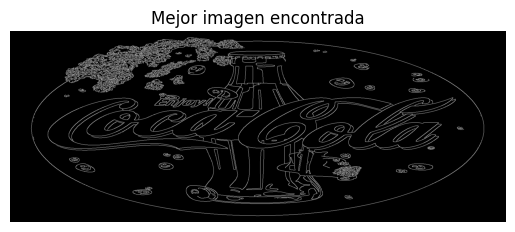

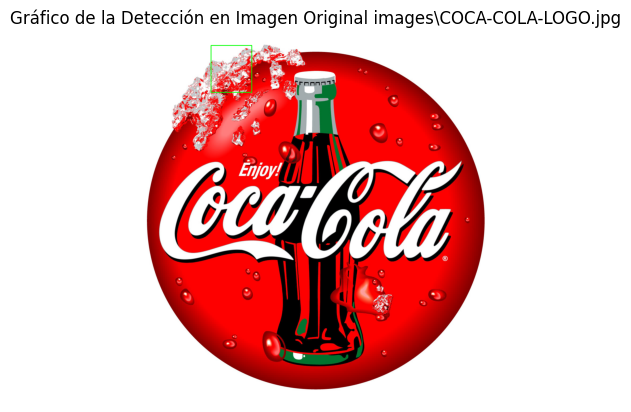

La similitud máxima fue de 0.37
Tamaño del template original: (175, 400)
El mejor tamaño del template fue de (112, 257)
Tamaño de la imagen original: (500, 207, 3)
El mejor tamaño de la imagen fue de (750, 310)


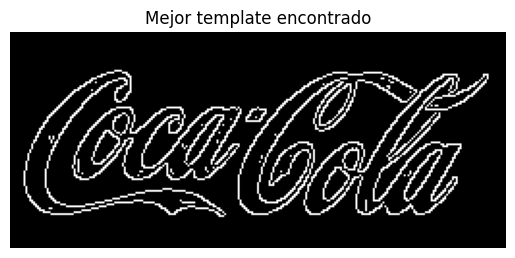

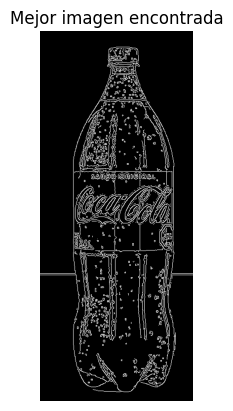

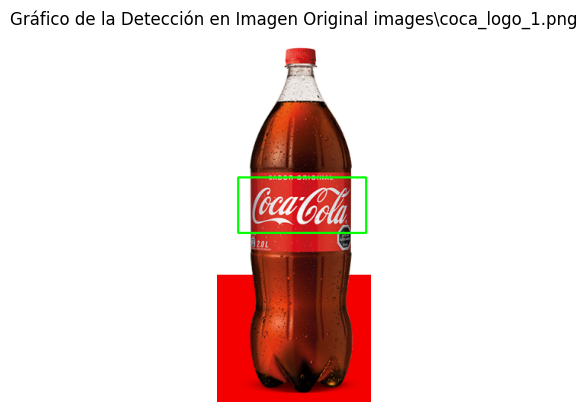

La similitud máxima fue de 0.25
Tamaño del template original: (175, 400)
El mejor tamaño del template fue de (88, 200)
Tamaño de la imagen original: (363, 233, 3)
El mejor tamaño de la imagen fue de (399, 303)


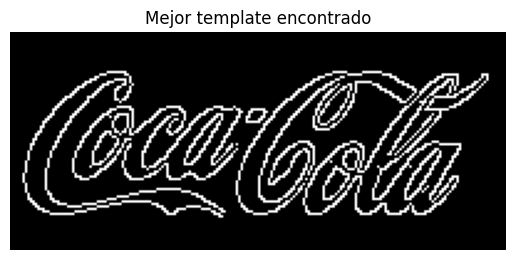

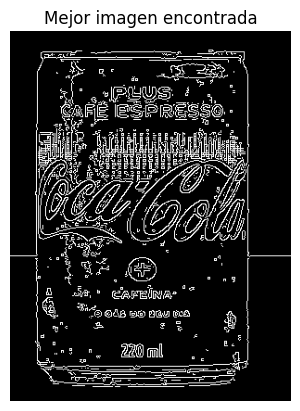

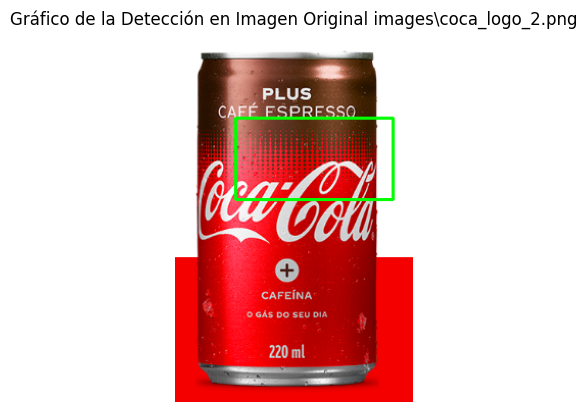

La similitud máxima fue de 0.24
Tamaño del template original: (175, 400)
El mejor tamaño del template fue de (88, 200)
Tamaño de la imagen original: (598, 799, 3)
El mejor tamaño de la imagen fue de (897, 1039)


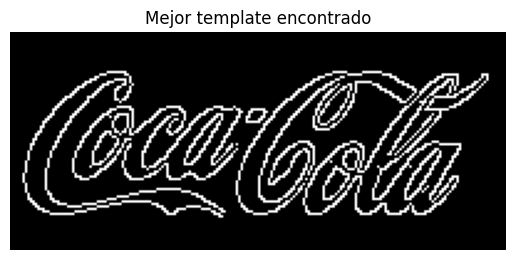

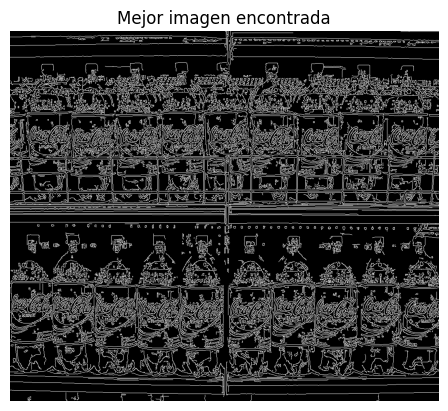

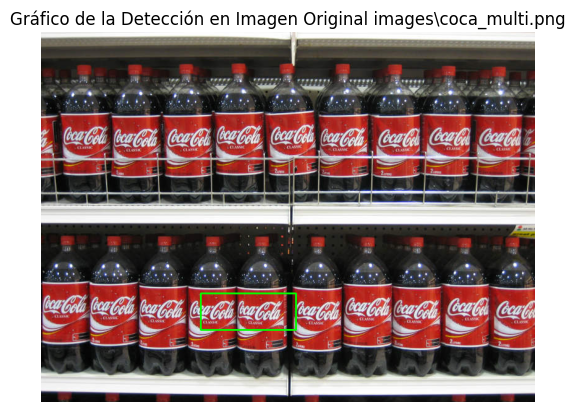

La similitud máxima fue de 0.25
Tamaño del template original: (175, 400)
El mejor tamaño del template fue de (88, 200)
Tamaño de la imagen original: (493, 715, 3)
El mejor tamaño de la imagen fue de (345, 644)


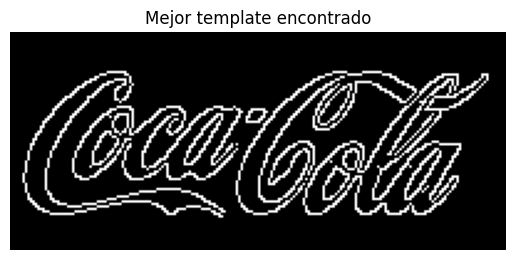

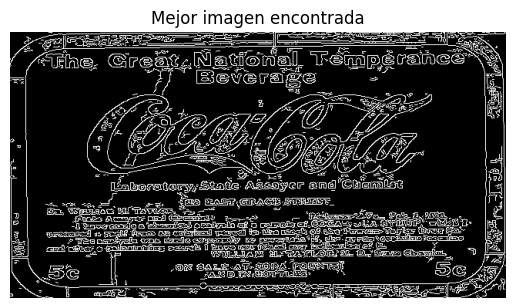

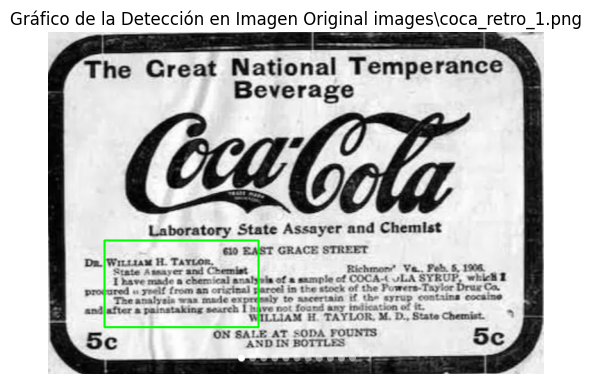

La similitud máxima fue de 0.31
Tamaño del template original: (175, 400)
El mejor tamaño del template fue de (88, 200)
Tamaño de la imagen original: (429, 715, 3)
El mejor tamaño de la imagen fue de (558, 930)


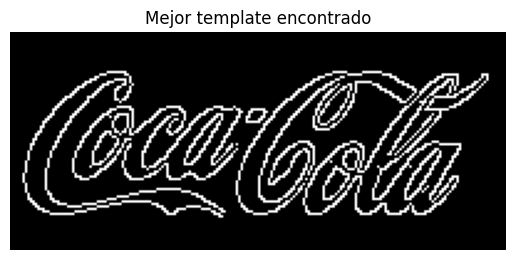

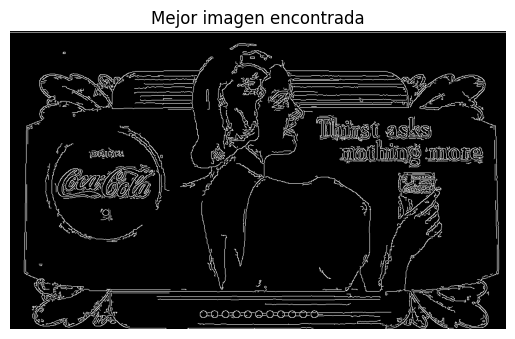

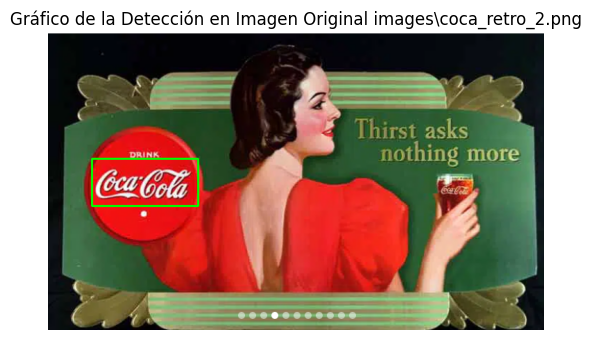

La similitud máxima fue de 0.25
Tamaño del template original: (175, 400)
El mejor tamaño del template fue de (88, 200)
Tamaño de la imagen original: (450, 687, 3)
El mejor tamaño de la imagen fue de (315, 481)


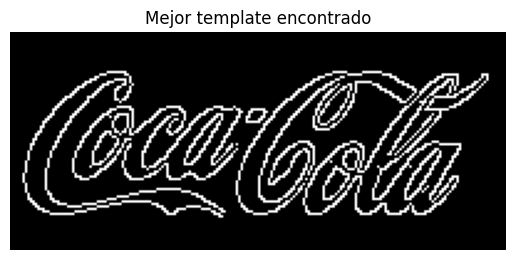

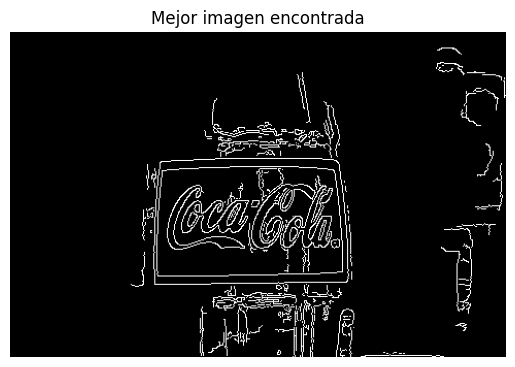

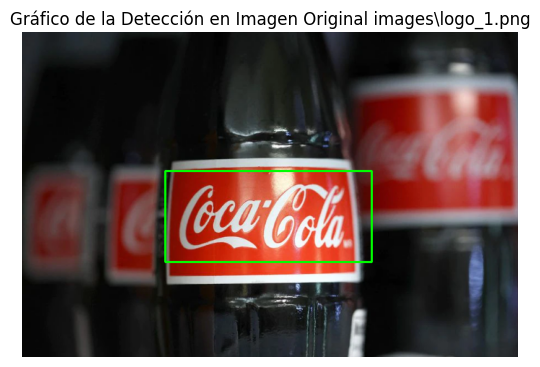

In [12]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import glob

# Los 6 métodos posibles para comparación, a modo de ayudamemoria
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

# Cargamos el template en escala de grises
template = cv.imread('template/pattern.png', cv.IMREAD_GRAYSCALE)
template_h, template_w = template.shape  # Tomar las dimensiones del template

# Lista de todas las imágenes en la carpeta 'images'
all_images_paths = glob.glob('images/*.*')

def unsharp_mask(image, kernel_size=(5, 5), sigma=1.0, amount=1.5, threshold=0):
    # Aplicar suavizado Gaussian a la imagen
    blurred = cv.GaussianBlur(image, kernel_size, sigma)

    # Calcular la máscara
    mask = cv.addWeighted(image, 1 + amount, blurred, -amount, 0)

    # Aplicar umbral para mejorar detalles
    if threshold > 0:
        low_contrast_mask = np.abs(image - blurred) < threshold
        np.copyto(mask, image, where=low_contrast_mask)

    return mask

# Esta variante de la función anterior permite ingresar los valores de escalamiento y además devuelve una lista de tuplas con la imagen escalada y los factores de escala fx y fy
# Esto resulta útil para poder ubicar el rectángulo en la imagen original
def piramide_imagenes_y_escalas_no_proporcion(img, min, max, cant):
    piramide = []
    
    # Listas de escalas para ancho y alto
    scales_x = np.linspace(min, max, cant)  # Escalas para el ancho (fx)
    scales_y = np.linspace(min, max, cant)  # Escalas para el alto (fy)

    # Iterar sobre las combinaciones de escalas de fx y fy
    for fx in scales_x:
        for fy in scales_y:
            # Redimensionar la imagen usando factores independientes para el ancho y alto
            imagen_escalada = cv.resize(img, None, fx=fx, fy=fy, interpolation=cv.INTER_LINEAR)
            elemento_piramide = [imagen_escalada, fx, fy]
            piramide.append(elemento_piramide)

    return piramide

# Función para aplicar Canny a cada template escalado, teniendo en cuenta que la la pirámide de templates es una lista de tuplas con la imagen escalada y los factores de escala fx y fy
def aplicar_canny_a_piramide(piramide):
    piramide_canny = []
    for tpl in piramide:
        tpl_canny = cv.Canny(tpl[0], 50, 150)
        piramide_canny.append([tpl_canny, tpl[1], tpl[2]])
    return piramide_canny

# Generar la pirámide de imágenes escaladas del template resaltado con unsharp mask con sus bordes
sharpened_template = unsharp_mask(template)
template_pyramid = piramide_imagenes_y_escalas_no_proporcion(sharpened_template, 0.5, 1.5, 8)
# Aplicar Canny a cada template escalado, teniendo en cuenta que la la pirámide de templates es una lista de tuplas con la imagen escalada y los factores de escala fx y fy
template_pyramid_canny = aplicar_canny_a_piramide(template_pyramid)

for path in all_images_paths:  # Iterar sobre todas las imágenes
    image = cv.imread(path)  # Cargar la imagen
    gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)  # Convertir la imagen a escala de grises
    # Aplicar unsharp mask a la imagen
    sharpened_image = unsharp_mask(gray_image)

    # Creo una pirámide de escalas de la imagen enmascarada
    image_pyramid = piramide_imagenes_y_escalas_no_proporcion(sharpened_image, 0.5, 1.5, 6)
    image_pyramid_canny = aplicar_canny_a_piramide(image_pyramid)

    # Inicializar las variables para almacenar los mejores resultados
    best_match_val = -1  # Inicializar con un valor bajo
    best_match_location = None
    best_template = None
    best_image = None
    best_scale_factor_template = None
    best_scale_factor_image = None

    for resized_image in image_pyramid_canny:  # Iterar sobre cada nivel de la pirámide de la imagen
        
        # Iterar sobre cada nivel del template en la pirámide
        for resized_template in template_pyramid_canny:
            tpl_h, tpl_w = resized_template[0].shape
            img_h, img_w = resized_image[0].shape

            # Obtener el factor de escala correspondiente del template y de la imagen
            scale_factor_template = [resized_template[1], resized_template[2]]
            scale_factor_image = [resized_image[1], resized_image[2]]

            # Asegurarse de que el template no sea más grande que la imagen
            if tpl_h > img_h or tpl_w > img_w:
                continue # Saltearse este template

            # Aplicar template matching
            result = cv.matchTemplate(resized_image[0], resized_template[0], cv.TM_CCORR_NORMED)
            min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)

            # Actualizar la mejor coincidencia si es mejor que la actual
            if max_val > best_match_val:
                best_match_val = max_val
                best_match_location = max_loc
                best_template = resized_template[0]
                best_image = resized_image[0]
                best_scale_factor_template = scale_factor_template
                best_scale_factor_image = scale_factor_image

    if best_match_location is not None:
        # Ajustar las coordenadas para la imagen original usando el factor de escala
        top_left = (
            int(best_match_location[0] / best_scale_factor_image[0]),
            int(best_match_location[1] / best_scale_factor_image[1])
        )
        template_h, template_w = best_template.shape
        bottom_right = (
            int((best_match_location[0] + template_w) / best_scale_factor_image[0]),
            int((best_match_location[1] + template_h) / best_scale_factor_image[1])
        )

        # Dibujar el rectángulo en la imagen original
        cv.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)

        print(f"La similitud máxima fue de {best_match_val:.2f}")
        print("Tamaño del template original:", template.shape)
        print(f"El mejor tamaño del template fue de {best_template.shape}")
        print(f"Tamaño de la imagen original: {image.shape}")
        print(f"El mejor tamaño de la imagen fue de {best_image.shape}")

        # Mostrar el template que mejor coincidió
        plt.imshow(best_template, cmap='gray')
        plt.title('Mejor template encontrado')
        plt.axis('off')
        plt.show()

        # Mostrar el template que mejor coincidió
        plt.imshow(best_image, cmap='gray')
        plt.title('Mejor imagen encontrada')
        plt.axis('off')
        plt.show()

        # Mostrar el resultado (imagen original con el bounding box dibujado)
        plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
        plt.title(f'Gráfico de la Detección en Imagen Original {path}')
        plt.axis('off')
        plt.show()

        # Mostrar el resultado (imagen con el rectángulo dibujado)
        #plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
        #plt.title(f'Detección en {path}')
        #plt.axis('off')
        #plt.show()
    else:
        print(f"No se encontró ninguna coincidencia en {path}")


# Probamos, sólo a modo de experimento, cómo funciona el matching usando ORB.

Tamaño del template original: (175, 400)
keypoints template: 532
keypoints imagen: 3000


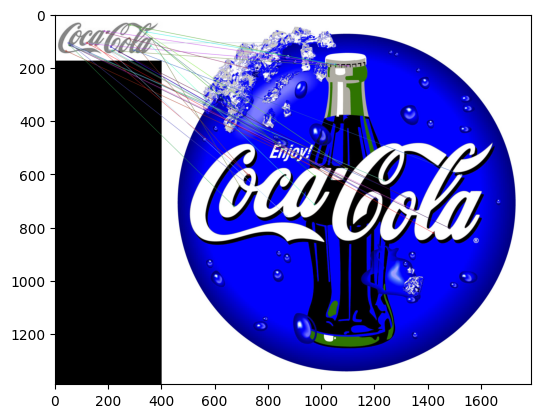

keypoints imagen: 1604


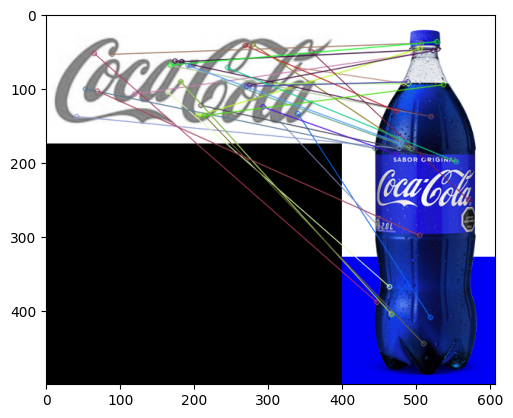

keypoints imagen: 1853


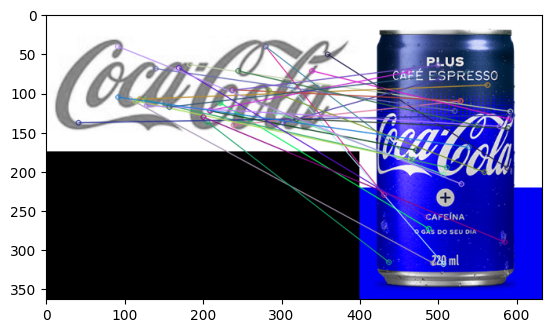

keypoints imagen: 3000


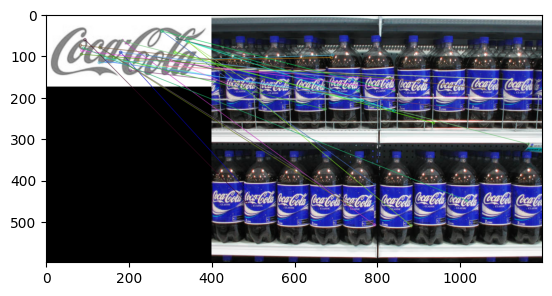

keypoints imagen: 3000


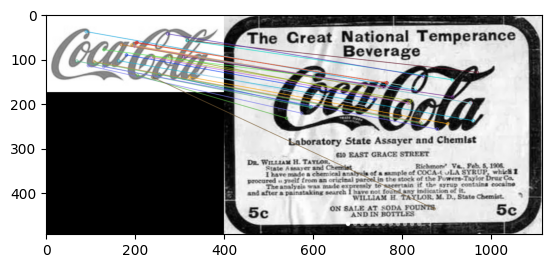

keypoints imagen: 2799


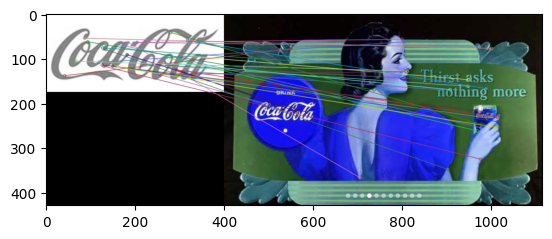

keypoints imagen: 1960


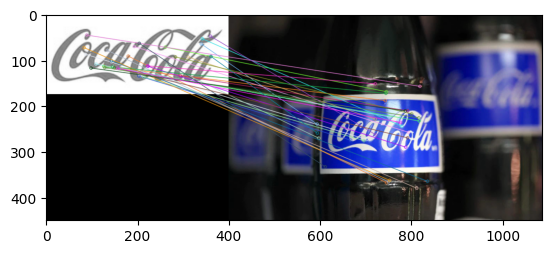

In [4]:
# MATCHING DE TEMPLATES UTILIZANDO ORB

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import glob

# Cargar el template en escala de grises
template = cv.imread('template/pattern.png', cv.IMREAD_GRAYSCALE)
template_h, template_w = template.shape
print("Tamaño del template original:", template.shape)

# Inicializamos el detector ORB
orb = cv.ORB_create(nfeatures=3000)

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(template,None)
print(f'keypoints template: {len(kp1)}')

# Lista de todas las imágenes en la carpeta 'images'
all_images_paths = glob.glob('images/*.*')

# Iterar sobre todas las imágenes
for path in all_images_paths:
    # Leer la imagen
    image = cv.imread(path)
    
    # find the keypoints and descriptors with ORB
    kp2, des2 = orb.detectAndCompute(image,None)
    print(f'keypoints imagen: {len(kp2)}')

    # Cremos el objeto BFMatcher
    bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

    # Coincidimos descriptores.
    matches = bf.match(des1, des2)

    # Los ordenamos según distancia
    matches = sorted(matches, key = lambda x:x.distance)

    # Dibujamos las primeras 30 coincidencias
    n=30
    img3 = cv.drawMatches(template,kp1,image,kp2,matches[:n],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.imshow(img3),plt.show()

## Parte 2: Algoritmo para múltiples detecciones en 'coca_multi.png'
Para múltiples instancias del logotipo en la imagen coca_multi.png tenemos que ajustar la lógica para permitir múltiples detecciones.

Se dibujan todos los bounding boxes que cumplen con el umbral definido (threshold).

Implementamos la función non_max_suppression() para evitar múltiples detecciones del mismo logo muy cercanas entre sí.

Dibujamos los bounding boxes solo para las detecciones que quedan después de aplicar NMS.

Número total de detecciones antes de NMS: 109
Número de detecciones después de NMS: 2


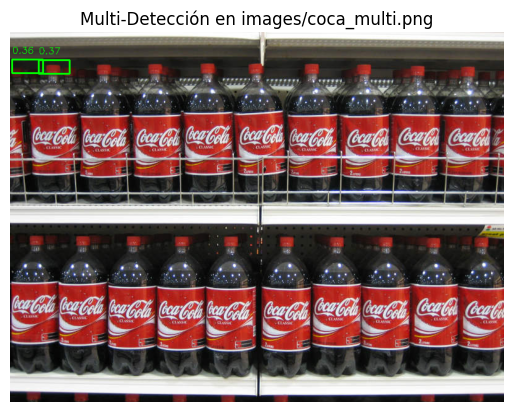

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Encontrar las pirámides Gaussianas de las dos imágenes
def gaussian_pyramid(img, num_levels):
    lower = img.copy()
    gaussian_pyr = [lower]
    for i in range(num_levels):
        lower = cv.pyrDown(lower)
        gaussian_pyr.append(np.uint8(lower))
    return gaussian_pyr

# Función para aplicar NMS
def non_max_suppression(boxes, scores, threshold=0.5):
    if len(boxes) == 0:
        return []

    boxes = np.array(boxes)
    scores = np.array(scores)

    x1 = boxes[:, 0]
    y1 = boxes[:, 1]
    x2 = boxes[:, 2]
    y2 = boxes[:, 3]

    areas = (x2 - x1 + 1) * (y2 - y1 + 1)
    order = scores.argsort()[::-1]

    keep = []
    while order.size > 0:
        i = order[0]
        keep.append(i)

        xx1 = np.maximum(x1[i], x1[order[1:]])
        yy1 = np.maximum(y1[i], y1[order[1:]])
        xx2 = np.minimum(x2[i], x2[order[1:]])
        yy2 = np.minimum(y2[i], y2[order[1:]])

        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)
        overlap = (w * h) / areas[order[1:]]

        order = order[np.where(overlap <= threshold)[0] + 1]

    return keep

# Cargar la imagen coca_multi.png
multi_image_path = 'images/coca_multi.png'
multi_image = cv.imread(multi_image_path)
gray_multi_image = cv.cvtColor(multi_image, cv.COLOR_BGR2GRAY)

# Aplicar Canny a la imagen para obtener sus bordes
image_edges = cv.Canny(gray_multi_image, 50, 150)

# Cargar el template en escala de grises y aplicar Canny
template = cv.imread('template/pattern.png', cv.IMREAD_GRAYSCALE)
template_edges = cv.Canny(template, 50, 150)

# Generar la pirámide de Gaussianas del template (con sus bordes) y de la imagen (con sus bordes)
template_pyramid = gaussian_pyramid(template_edges, 3)
image_pyramid = gaussian_pyramid(image_edges, 3)

# Lista para guardar los cuadros delimitadores (bounding boxes) y los puntajes
boxes = []
scores = []

# Iterar sobre los niveles de la pirámide
for img_level, tpl_level in zip(image_pyramid, template_pyramid):
    tpl_h, tpl_w = tpl_level.shape
    img_h, img_w = img_level.shape

    # Si el template es más grande que el nivel de imagen, omitir
    if tpl_h > img_h or tpl_w > img_w:
        continue

    # Aplicar template matching en este nivel usando las imágenes con bordes
    result_multi = cv.matchTemplate(img_level, tpl_level, cv.TM_CCOEFF_NORMED)
    threshold_multi = 0.3  # Ajusta el umbral según la calidad de las detecciones
    locations_multi = np.where(result_multi >= threshold_multi)

    # Guardar las coordenadas de las detecciones y sus puntuaciones
    for pt in zip(*locations_multi[::-1]):
        x1, y1 = pt
        x2, y2 = x1 + tpl_w, y1 + tpl_h
        confidence = result_multi[pt[1], pt[0]]
        boxes.append([x1, y1, x2, y2])
        scores.append(confidence)

print(f"Número total de detecciones antes de NMS: {len(boxes)}")

# Aplicar NMS para eliminar solapamientos
keep_indices = non_max_suppression(boxes, scores, threshold=0.4)

# Dibujar los bounding boxes finales en la imagen original
for idx in keep_indices:
    x1, y1, x2, y2 = boxes[idx]
    confidence = scores[idx]
    cv.rectangle(multi_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv.putText(multi_image, f'{confidence:.2f}', (x1, y1 - 10), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

print(f"Número de detecciones después de NMS: {len(keep_indices)}")

# Mostrar el resultado
plt.imshow(cv.cvtColor(multi_image, cv.COLOR_BGR2RGB))
plt.title(f'Multi-Detección en {multi_image_path}')
plt.axis('off')
plt.show()


## Parte 3: Generalización del algoritmo para todas las imágenes.
Vamos a generalizar el algoritmo para todas las imágenes de la carpeta y usaremos el método de supresión de no máximos (NMS) para evitar solapamientos innecesarios en las detecciones.

Usamos glob para iterar sobre todas las imágenes en la carpeta 'images'.

Implementamos la función non_max_suppression() para evitar múltiples detecciones del mismo logo muy cercanas entre sí.

Dibujamos los bounding boxes solo para las detecciones que quedan después de aplicar NMS.

In [18]:
import glob

# Función para aplicar NMS
def non_max_suppression(boxes, scores, threshold=0.5):
    if len(boxes) == 0:
        return []

    boxes = np.array(boxes)
    scores = np.array(scores)

    x1 = boxes[:, 0]
    y1 = boxes[:, 1]
    x2 = boxes[:, 2]
    y2 = boxes[:, 3]

    areas = (x2 - x1 + 1) * (y2 - y1 + 1)
    order = scores.argsort()[::-1]

    keep = []
    while order.size > 0:
        i = order[0]
        keep.append(i)

        xx1 = np.maximum(x1[i], x1[order[1:]])
        yy1 = np.maximum(y1[i], y1[order[1:]])
        xx2 = np.minimum(x2[i], x2[order[1:]])
        yy2 = np.minimum(y2[i], y2[order[1:]])

        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)
        overlap = (w * h) / areas[order[1:]]

        order = order[np.where(overlap <= threshold)[0] + 1]

    return keep

# Generalizar para todas las imágenes
all_images_paths = glob.glob('images/*.png')

for path in all_images_paths:
    # Leer la imagen
    image = cv.imread(path)
    gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    # Aplicar template matching
    result = cv.matchTemplate(gray_image, template, cv.TM_CCOEFF_NORMED)
    threshold = 0.8
    locations = np.where(result >= threshold)

    # Guardar las coordenadas de las detecciones y sus puntuaciones
    boxes = []
    scores = []

    for pt in zip(*locations[::-1]):
        x1, y1 = pt
        x2, y2 = x1 + template_w, y1 + template_h
        confidence = result[pt[1], pt[0]]
        boxes.append([x1, y1, x2, y2])
        scores.append(confidence)

    # Aplicar NMS para eliminar solapamientos
    keep_indices = non_max_suppression(boxes, scores, threshold=0.5)

    # Dibujar los bounding boxes finales
    for idx in keep_indices:
        x1, y1, x2, y2 = boxes[idx]
        confidence = scores[idx]
        cv.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv.putText(image, f'{confidence:.2f}', (x1, y1 - 10), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

    # Mostrar el resultado
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.title(f'Detección generalizada en {path}')
    plt.axis('off')
    plt.show()


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\templmatch.cpp:1175: error: (-215:Assertion failed) _img.size().height <= _templ.size().height && _img.size().width <= _templ.size().width in function 'cv::matchTemplate'


## Parte 4: Puntos extra. Aplicar unsharp masking para expandir la zona de enfoque y devolver.
Vamos a aplicar unsharp masking para mejorar la nitidez de las imágenes y expandir la zona de enfoque. Esto resalta los detalles al aumentar el contraste de los bordes haciendo así que el logotipo sea más visible antes de la detección.

In [ ]:
for path in all_images_paths:
    # Leer la imagen
    image = cv2.imread(path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Aplicar Unsharp Masking
    sharpened_image = unsharp_mask(gray_image, kernel_size=(5, 5), sigma=1.0, amount=1.5, threshold=10)

    # Aplicar template matching sobre la imagen mejorada
    result = cv2.matchTemplate(sharpened_image, template, cv2.TM_CCOEFF_NORMED)
    threshold = 0.8
    locations = np.where(result >= threshold)

    # Dibujar los bounding boxes para cada coincidencia
    for pt in zip(*locations[::-1]):
        cv2.rectangle(image, pt, (pt[0] + template_w, pt[1] + template_h), (0, 255, 0), 2)
        confidence = result[pt[1], pt[0]]
        cv2.putText(image, f'{confidence:.2f}', (pt[0], pt[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

    # Mostrar el resultado
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f'Detección con Unsharp Masking en {path}')
    plt.axis('off')
    plt.show()


Lo que hicimos fue aplicar unsharp_mask a la imagen en escala de grises para resaltar los bordes y después realizamos template matching con la imagen mejorada para detectar el logotipo.